# Usage of the `calcimetry` module

This is a high level (low code) API in python to request information stored in the database

In [1]:
from calcimetry.mongo_api import MongoInfo

# parameters where the database is stored, can obviously be distant.
HOST='localhost'
PORT=27010

### Retrieves all drill names

In [2]:
from calcimetry.calcimetry_api import CalcimetryAPI

mongo_info = MongoInfo(host=HOST, port=PORT)
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    print(calcimetry_api.get_drill_names())

    # but maybe this makes sense
    print(calcimetry_api.get_drill_list())

{'SUG2020', 'DIR1003', 'TER1101', 'OHZ5310', 'OHZ1703', 'FOR1001', 'OHZ2030', 'OHZ7004', 'OHZ2021', 'OHZ1843', 'OHZ2002', 'SUG1302', 'TPV1322', 'MCC1701', 'KEY1205', 'REP2104', 'OHZ2024', 'SUG1107', 'DIR1002', 'NSC1412', 'REP2209', 'FRO1001', 'REP2302', 'MAG3001', 'GIS1003', 'IBE2003', 'OHZ3004', 'GIS1002', 'SUG1118', 'NIH2002', 'PEP1002', 'NIH2012', 'OHZ1841', 'DPC3022', 'OHZ1525', 'OHZ7008', 'MCO3002', 'PAC2003', 'DPC3024', 'REP2206', 'DIR2001', 'KEY1006', 'DIR2003', 'OHZ5303', 'SDZ1287', 'SDZ1286', 'SDZ1255', 'OHZ6560', 'SUG1202', 'SDZ1257', 'MCO3001', 'OHZ1844', 'SDZ1276', 'OHZ2020', 'OHZ2025', 'BPE4024', 'SUG2102', 'SUG1105', 'MAG3002', 'TER1302', 'NSC1411', 'REP2303', 'DPC3063', 'OHZ7006', 'BPE4023', 'DIR2002', 'GIS1001', 'SUG1303', 'SUG1201', 'SUG2101', 'PAC1001', 'REP2301', 'KEY1005', 'OHZ1302', 'TER1201', 'NIH2011', 'PAC1002', 'KEY1202', 'SDZ1285', 'IBE2001', 'OHZ2003', 'SDZ1290', 'SUG1106', 'OHZ2006', 'OHZ2026', 'OHZ2029', 'OHZ2010', 'TPV1321', 'OHZ2023', 'PEP1003', 'OHZ2028'

### Retrieves image ids for one drillname
 

In [7]:
drillname="IBE2003"
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    print(calcimetry_api.get_images_id(drillname))

[580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669]


### Retrieve one image and its description from its id

{'ImageId': 580, 'FileName': 'GTR2018-12_0028-IBE2003_0000_0108.JPG', 'DrillName': 'IBE2003', 'Cote0': 0, 'Cote1': 108, 'PxSize': 19163, 'PySize': 4833, 'px0': 72, 'px1': 19017, 'k_Up': [[9950, 2299], [11623, 2294], [13465, 2318], [14444, 2319], [18247, 2333], [19149, 2348]], 'k_Down': [[9970, 3258], [12825, 3275], [13456, 3260], [13565, 3278], [14956, 3271], [17353, 3251], [18194, 3249], [19144, 3261]], 'k_Arrow': [[9835, 2796], [11468, 2828], [13266, 2856], [13399, 2891], [14086, 2885], [19150, 2875]], 'criteria': {'n_measurements': 3, 'resolution': 0.005700712589073635, 'y_ratio': 0.19532381543554728}}
# of measurements for this img: 3


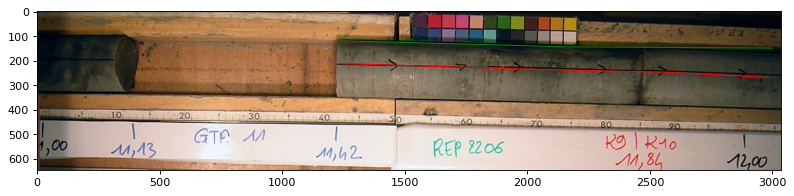

In [41]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import patches
from calcimetry.carrot_img import CarrotImage
from calcimetry.polyline import Polyline
IMG_ID = 2123


def draw_line(polyline: Polyline, color='red'):
    x = []
    y = []
    for t in iter(polyline):
        x.append(t[0])
        y.append(t[1])
    apath = Path(list(zip(x, y)))
    apatch = patches.PathPatch(apath, linewidth=1, facecolor='none', edgecolor=color)
    return apatch


with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    print(calcimetry_api.read_image_info(IMG_ID)) # database info 

    img = calcimetry_api.read_image(IMG_ID)
    print(img.resolution)

    zoomed_img = img.to_resolution(0.035)
    print(img.jpg.size, zoomed_img.jpg.size, zoomed_img.resolution)
    plt.figure(figsize=(12, 8), dpi=80)
    plt.imshow(zoomed_img.jpg)
    if not zoomed_img.k_arrow.empty:
        arrow_line = draw_line(zoomed_img.k_arrow)
        plt.gca().add_patch(arrow_line)
        arrow_line = draw_line(zoomed_img.k_up, color='green')
        plt.gca().add_patch(arrow_line)

  
    # CarrotImage infos
    print(f"# of measurements for this img: {img.n_measurements}")


### Select one part of the image at one measurement location


In [5]:
from calcimetry.measurement import Measurement

idx_measure = 1
measure = img.measurements[idx_measure]

# display some information of the measurement
print(measure)



Measure (1048): (3005->19)


Text(0.5, 0, 'val1m: 43')

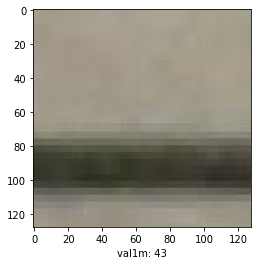

In [38]:
dim = 128
center = (
    img.p_x(measure.cote), # get for this picture the position in pixel from this measure, shift of half of the size
    img.k_arrow.p_y(measure.cote)# get on k_arrow line the position in pixel from this measure
    )
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    vignette = calcimetry_api.read_vignette(IMG_ID, center, dim=dim)
plt.imshow(vignette)
plt.xlabel(f"val1m: {measure.val_1m}")


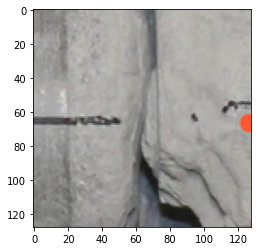

In [37]:
dim = 128
center = (
    zoomed_img.p_x(measure.cote), # get for this picture the position in pixel from this measure, shift of half of the size
    zoomed_img.k_arrow.p_y(measure.cote) # get on k_arrow line the position in pixel from this measure
    )
vignette = zoomed_img.vignette(dim=dim, center=center)
plt.imshow(vignette)

### Retrieves images infos as a pandas dataframe

In [8]:
import pandas as pd
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    df = calcimetry_api.get_images_df()
    print(df.head())

   ImageId                               FileName DrillName  Cote0  Cote1  \
0        0  GTR2012-07_0023_BPE4023_0000_0110.jpg   BPE4023      0    110   
1        1  GTR2012-07_0023_BPE4023_0090_0200.jpg   BPE4023     90    200   
2        2  GTR2012-07_0023_BPE4023_0180_0290.jpg   BPE4023    180    290   
3        3  GTR2012-07_0023_BPE4023_0270_0380.jpg   BPE4023    270    380   
4        4  GTR2012-07_0023_BPE4023_0350_0440.jpg   BPE4023    350    440   

   PxSize  PySize    px0     px1  \
0    3231     625   28.0  3137.0   
1    3456     630  172.0  3311.0   
2    3456     630  135.0  3273.0   
3    3456     636   97.0  3224.0   
4    2824     640    2.0  2574.0   

                                                k_Up  \
0  [[55, 173], [259, 179], [430, 177], [583, 171]...   
1  [[11, 187], [556, 189], [1081, 190], [1590, 18...   
2  [[8, 166], [388, 171], [1155, 177], [2061, 184...   
3  [[5, 181], [811, 182], [1253, 190], [2597, 199...   
4  [[6, 185], [186, 187], [524, 180], [1